<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Iris_Dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris is a very famous dataset, preloaded with Python libraries, it shows info about a flower and gives distribution of that, Sepal, Petal (based on class 0, 1, 2 of Iris Flower)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable
df['target'] = iris.target

# Print the head of the DataFrame
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


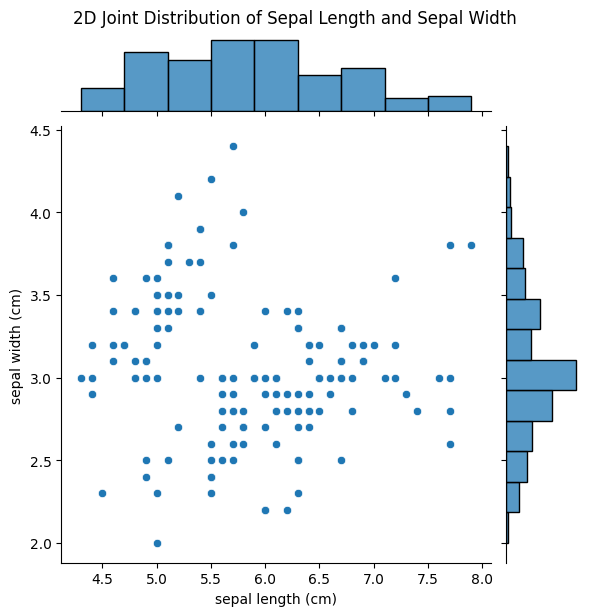

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2D joint distribution plot of sepal length and sepal width
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df, kind='scatter')
plt.suptitle('2D Joint Distribution of Sepal Length and Sepal Width', y=1.02) # Add a title to the figure
plt.show()

We here have scatter plot, with Marginal Distributions of X and Y, Marginal is basically distribution formed by just the effect of that perticular variable (Marginal X= info about PMF just using info of X and not Y)

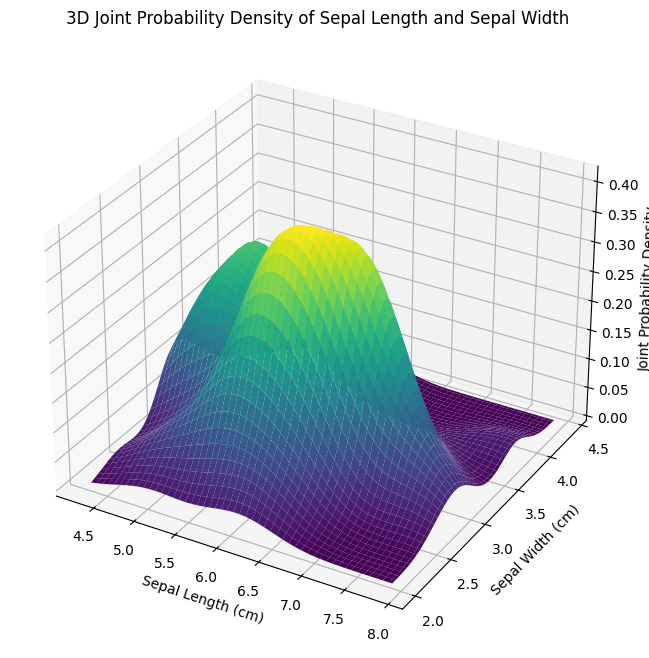

In [4]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract sepal length and sepal width
x = df['sepal length (cm)'].values
y = df['sepal width (cm)'].values

# Combine the data into a single array for KDE
data = np.vstack([x, y])

# Perform Kernel Density Estimation
kde = gaussian_kde(data)

# Create a grid for plotting the surface
x_grid, y_grid = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
xy_grid = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the KDE on the grid
z_grid = kde(xy_grid).reshape(x_grid.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Joint Probability Density')
plt.title('3D Joint Probability Density of Sepal Length and Sepal Width')

plt.show()

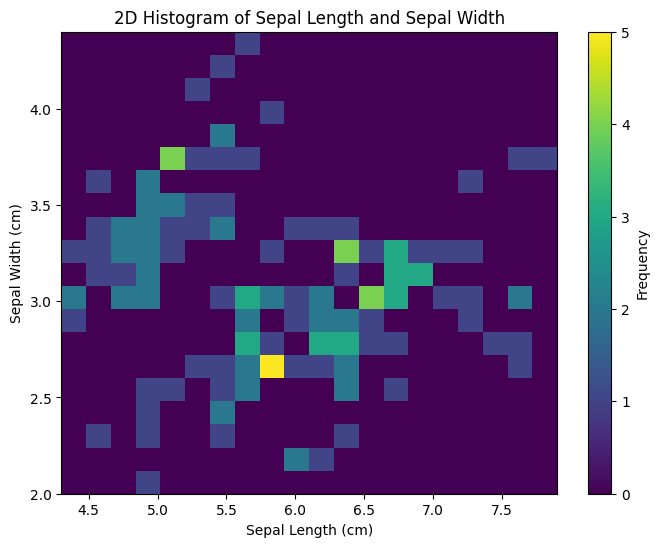

In [5]:
import matplotlib.pyplot as plt

# Extract sepal length and sepal width
x = df['sepal length (cm)'].values
y = df['sepal width (cm)'].values

# Create a 2D histogram
# The 'bins' parameter controls the number of bins on each axis
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=(20, 20), cmap='viridis')
plt.colorbar(label='Frequency')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('2D Histogram of Sepal Length and Sepal Width')
plt.show()

In [6]:
import pandas as pd

# Discretize sepal length and sepal width into bins
# You can adjust the number of bins as needed
df['sepal_length_bin'] = pd.cut(df['sepal length (cm)'], bins=10)
df['sepal_width_bin'] = pd.cut(df['sepal width (cm)'], bins=10)

# Create a contingency table
contingency_table = pd.crosstab(df['sepal_length_bin'], df['sepal_width_bin'])

# Display the contingency table
display(contingency_table)

sepal_width_bin,"(1.998, 2.24]","(2.24, 2.48]","(2.48, 2.72]","(2.72, 2.96]","(2.96, 3.2]","(3.2, 3.44]","(3.44, 3.68]","(3.68, 3.92]","(3.92, 4.16]","(4.16, 4.4]"
sepal_length_bin,,,,,,,,,,
"(4.296, 4.66]",0,1,0,1,5,1,1,0,0,0
"(4.66, 5.02]",1,2,1,0,10,5,4,0,0,0
"(5.02, 5.38]",0,0,2,0,0,3,3,5,1,0
"(5.38, 5.74]",0,3,6,5,4,2,1,4,0,2
"(5.74, 6.1]",2,0,7,5,6,1,0,0,1,0
"(6.1, 6.46]",1,1,4,7,3,4,0,0,0,0
"(6.46, 6.82]",0,0,1,3,12,2,0,0,0,0
"(6.82, 7.18]",0,0,0,0,6,0,0,0,0,0
"(7.18, 7.54]",0,0,0,2,2,0,1,0,0,0


Above is a contingency table for Sepal Length vs Width, we did binning to get that

Now let me explain relationship between

*   Contingency Table
*   Heat Map (2d histogram)
*   Scatter Plot
*   3d continuous joint distribution curve

They all are the same, some express data in 2d, some in 3d

*  If we do binning in Scatter plot, we get a contingency table
*  If we use colours to represent frequency instead of numbers in a contingency table, we head heat map
*  I we bring the Z axis (Pmf(x,y)), then we get the height of distribution as it becomes 3d, it becomes joint 3d distribution curve

Clearly they all show the same thing



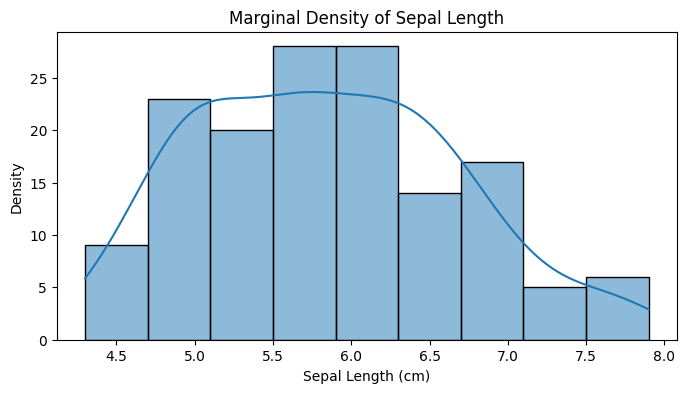

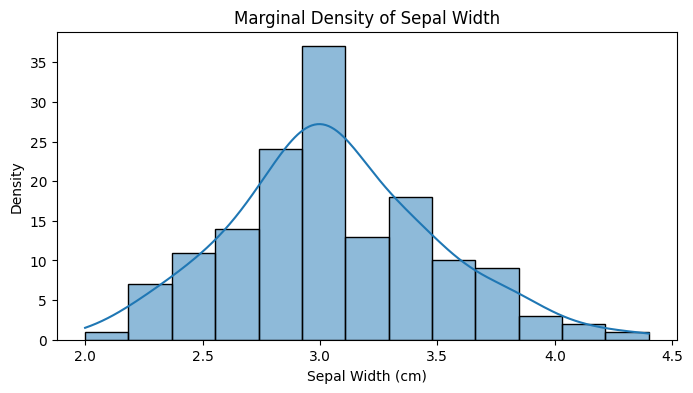

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot marginal density for Sepal Length
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Marginal Density of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# Plot marginal density for Sepal Width
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Marginal Density of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.show()

Now, let's quickly analyse joint distributions of Petals (length vs width)

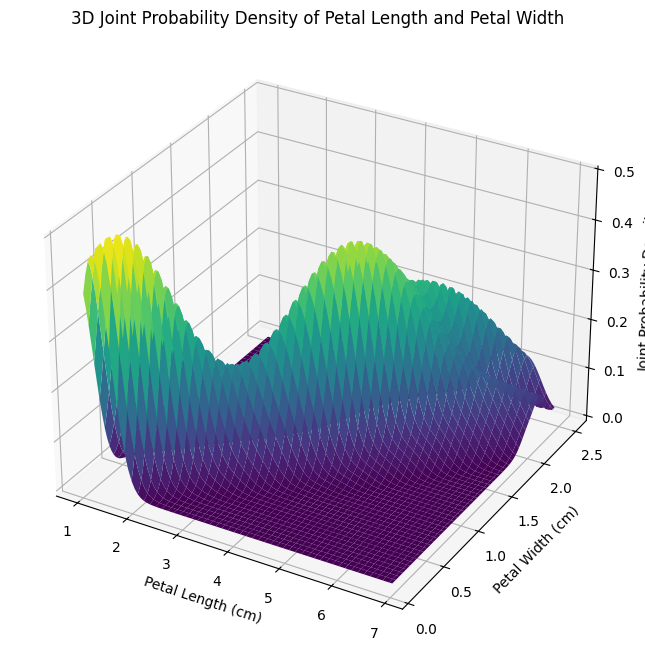

In [12]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract petal length and petal width
x_petal = df['petal length (cm)'].values
y_petal = df['petal width (cm)'].values

# Combine the data into a single array for KDE
data_petal = np.vstack([x_petal, y_petal])

# Perform Kernel Density Estimation for petal features
kde_petal = gaussian_kde(data_petal)

# Create a grid for plotting the surface for petal features
x_grid_petal, y_grid_petal = np.mgrid[x_petal.min():x_petal.max():100j, y_petal.min():y_petal.max():100j]
xy_grid_petal = np.vstack([x_grid_petal.ravel(), y_grid_petal.ravel()])

# Evaluate the KDE on the grid for petal features
z_grid_petal = kde_petal(xy_grid_petal).reshape(x_grid_petal.shape)

# Create the 3D plot for petal features
fig_petal = plt.figure(figsize=(10, 8))
ax_petal = fig_petal.add_subplot(111, projection='3d')

# Plot the surface for petal features
ax_petal.plot_surface(x_grid_petal, y_grid_petal, z_grid_petal, cmap='viridis')

ax_petal.set_xlabel('Petal Length (cm)')
ax_petal.set_ylabel('Petal Width (cm)')
ax_petal.set_zlabel('Joint Probability Density')
plt.title('3D Joint Probability Density of Petal Length and Petal Width')

plt.show()

# Conditional Density

Now we already know that there are Classes of Iris,
* Class 0
* Class 1
* Class 2

Target Column, describes the class of the flower, it has values

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Let's plot distribution of Sepal Length and Width, from class 0, 1, 2

The 3D plots generated for each class are showing the conditional joint probability density of sepal length and sepal width, given that the iris belongs to that specific class

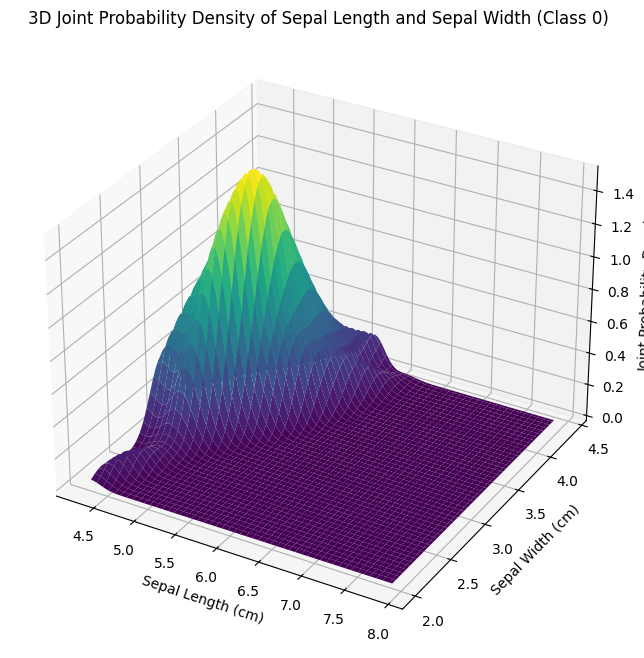

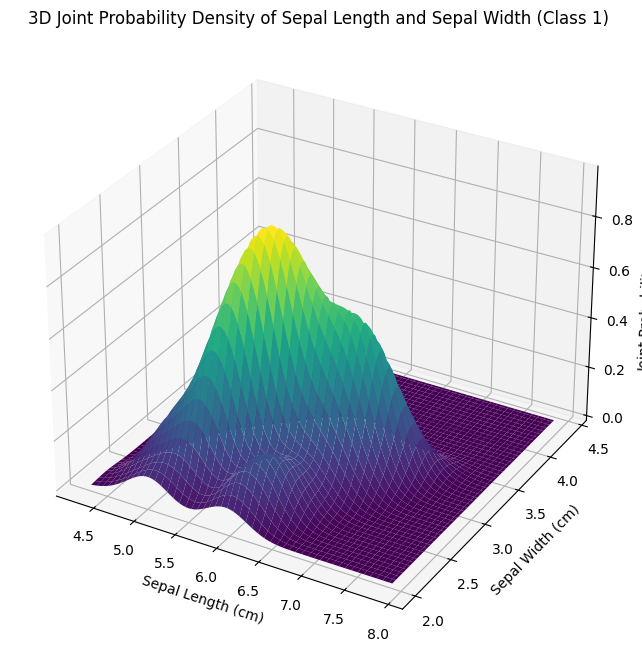

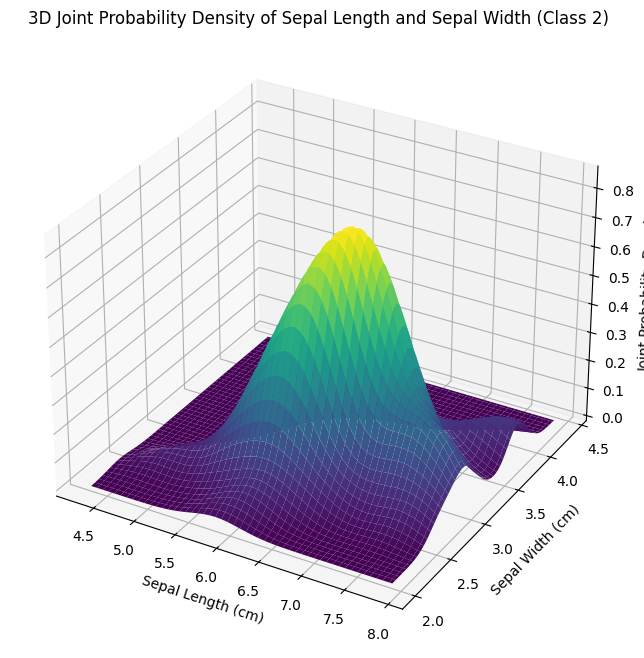

In [13]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get unique target values
unique_targets = df['target'].unique()

for target_class in unique_targets:
    # Filter data for the current class
    df_class = df[df['target'] == target_class]

    # Extract sepal length and sepal width for the current class
    x_sepal_class = df_class['sepal length (cm)'].values
    y_sepal_class = df_class['sepal width (cm)'].values

    # Combine the data into a single array for KDE
    data_sepal_class = np.vstack([x_sepal_class, y_sepal_class])

    # Perform Kernel Density Estimation for sepal features for the current class
    # Need enough data points for KDE
    if data_sepal_class.shape[1] > 1:
        kde_sepal_class = gaussian_kde(data_sepal_class)

        # Create a grid for plotting the surface for sepal features
        # Use the overall min/max for consistent plot ranges
        x_grid_sepal, y_grid_sepal = np.mgrid[df['sepal length (cm)'].min():df['sepal length (cm)'].max():100j,
                                              df['sepal width (cm)'].min():df['sepal width (cm)'].max():100j]
        xy_grid_sepal = np.vstack([x_grid_sepal.ravel(), y_grid_sepal.ravel()])

        # Evaluate the KDE on the grid for sepal features for the current class
        z_grid_sepal_class = kde_sepal_class(xy_grid_sepal).reshape(x_grid_sepal.shape)

        # Create the 3D plot for sepal features for the current class
        fig_sepal_class = plt.figure(figsize=(10, 8))
        ax_sepal_class = fig_sepal_class.add_subplot(111, projection='3d')

        # Plot the surface for sepal features for the current class
        ax_sepal_class.plot_surface(x_grid_sepal, y_grid_sepal, z_grid_sepal_class, cmap='viridis')

        ax_sepal_class.set_xlabel('Sepal Length (cm)')
        ax_sepal_class.set_ylabel('Sepal Width (cm)')
        ax_sepal_class.set_zlabel('Joint Probability Density')
        plt.title(f'3D Joint Probability Density of Sepal Length and Sepal Width (Class {target_class})')

        plt.show()
    else:
        print(f"Not enough data points to perform KDE for class {target_class}")

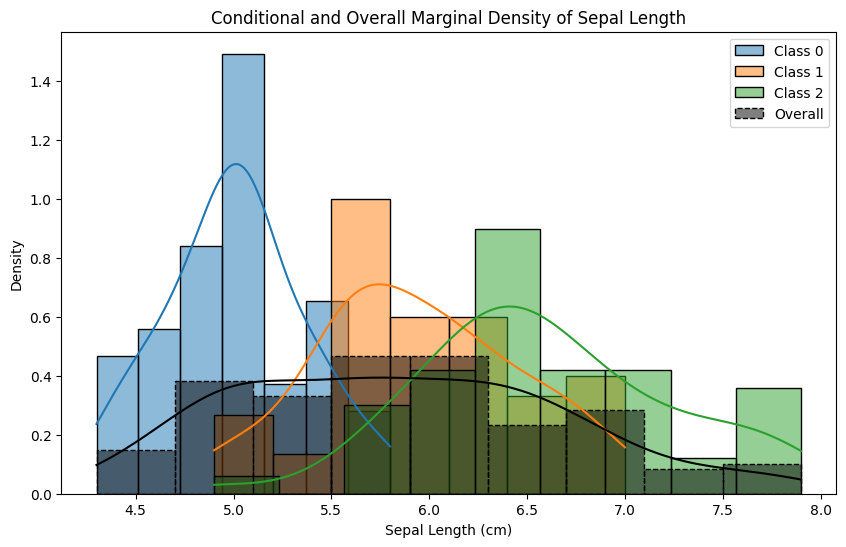

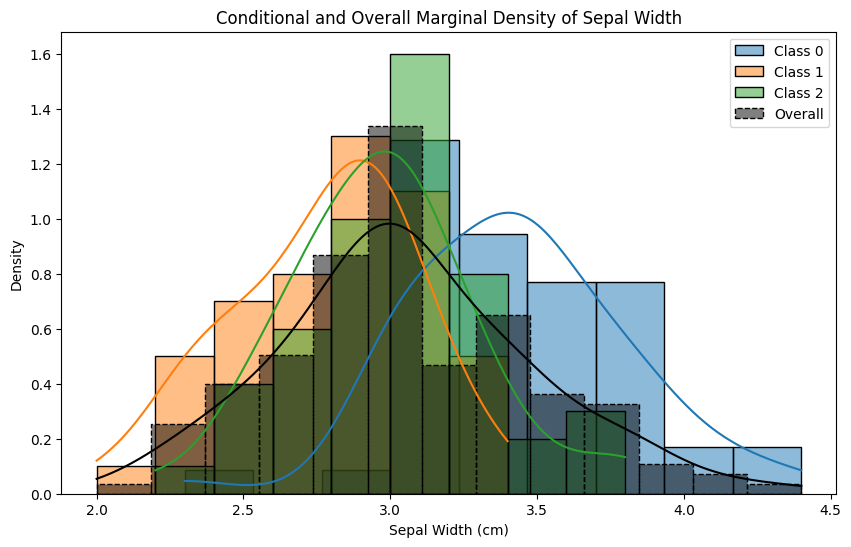

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique target values
unique_targets = df['target'].unique()

# Plot conditional marginal density for Sepal Length for each class
plt.figure(figsize=(10, 6))
for target_class in unique_targets:
    sns.histplot(df[df['target'] == target_class]['sepal length (cm)'], kde=True, label=f'Class {target_class}', stat='density', common_norm=False)
sns.histplot(df['sepal length (cm)'], kde=True, color='black', linestyle='--', label='Overall', stat='density', common_norm=False)
plt.title('Conditional and Overall Marginal Density of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot conditional marginal density for Sepal Width for each class
plt.figure(figsize=(10, 6))
for target_class in unique_targets:
    sns.histplot(df[df['target'] == target_class]['sepal width (cm)'], kde=True, label=f'Class {target_class}', stat='density', common_norm=False)
sns.histplot(df['sepal width (cm)'], kde=True, color='black', linestyle='--', label='Overall', stat='density', common_norm=False)
plt.title('Conditional and Overall Marginal Density of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.legend()
plt.show()

Clearly we can see different conditional distributions, then they are multiplied with discrete pmf of Flower Class, and we get the Mixed Distribution (Categorial + Discrete Combined)

Mixed distribution is the distribution which is neither discrete, nor continuous

# Inference From Dataset (Classifier)

Given we have a mixed joint distribution of the Sepal Width,

We pick a random sepal, get it's width, can we comment on the class of that sepal?

Class 0, 1 or 2?

The posterior probability of class ( i ) given the sepal width is given by Bayes' theorem as:

$$ P(\text{Class } i \mid \text{Sepal Width}) = \frac{P(\text{Sepal Width} \mid \text{Class } i) \cdot P(\text{Class } i)}{\sum_{j=0}^2 P(\text{Sepal Width} \mid \text{Class } j) \cdot P(\text{Class } j)}. $$

Numerator is joint probability for a single instance, and denominator is complete marginal probability which we get by summing over mixed distributions to get a single mixed marginal distribution for Sepal Width

To classify a sepal based on its width, choose the class ( i ) that maximizes the posterior probability:

$$ \hat{i} = \arg\max_{i \in {0, 1, 2}} P(\text{Class } i \mid \text{Sepal Width}). $$

Classic Baye's Rule Situation

We call this the baby form of our **Bayesian Classifier**